In [1]:
from model import SDEDiffusion
import torch
from matplotlib import pyplot as plt
import numpy as np
from mmcv import Config
from helper_utils import show_or_save_batch_img_tensor
from IPython.display import clear_output

/home/dmt/anaconda3/envs/shao-tao-dl-torch-2-1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/dmt/anaconda3/envs/shao-tao-dl-torch-2-1/lib/python3.9/site-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


ImportError: cannot import name 'Config' from 'mmcv' (/home/dmt/anaconda3/envs/shao-tao-dl-torch-2-1/lib/python3.9/site-packages/mmcv/__init__.py)

In [ ]:
config = Config.fromfile('./mnist_config.py')
config.device = 'mps'

In [ ]:
model = SDEDiffusion(config)
state_dict = torch.load('./last.ckpt', map_location='cpu')['state_dict']
state_dict = {k[6:]: v for k, v in state_dict.items()}
model.load_state_dict(state_dict)
model.to('mps')
clear_output()

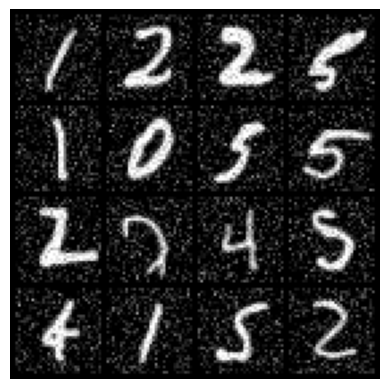

In [ ]:
imgs = model.sample()
imgs = torch.clip(imgs, 0.0, 1.0)
_ = show_or_save_batch_img_tensor(imgs, 4, False)